# Tema Hardware y Computo para DL/ML

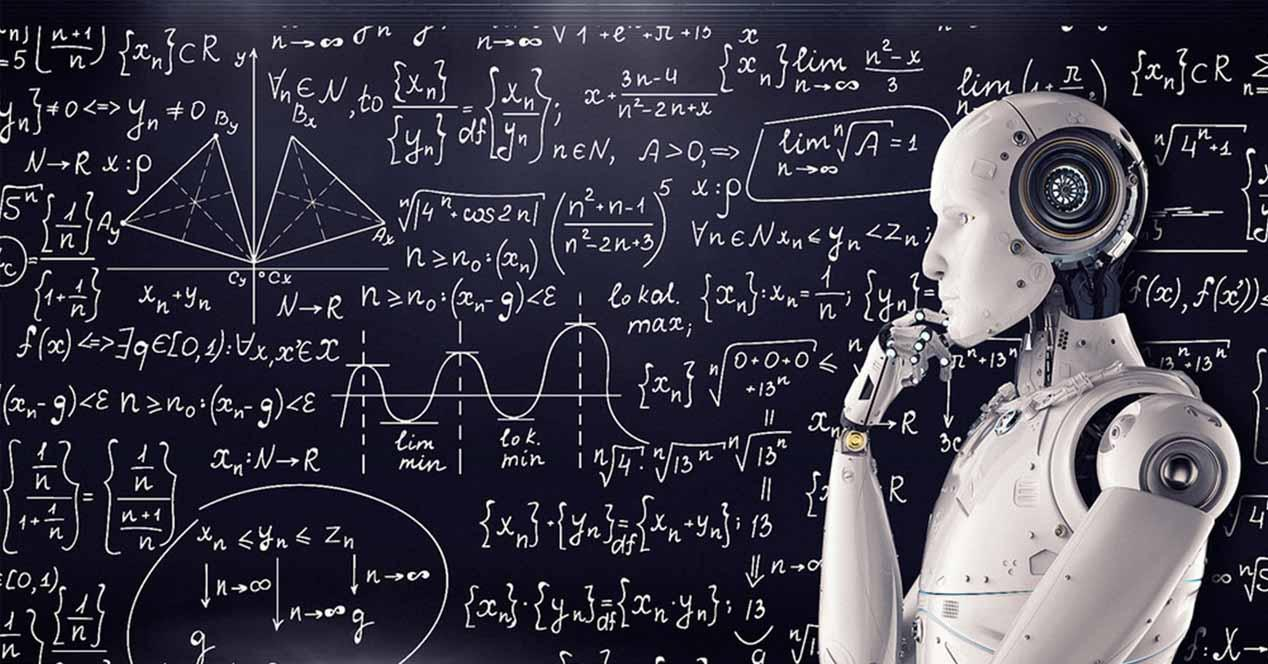

In [115]:
display.Image("https://hardzone.es/app/uploads-hardzone.es/2021/05/Machine-Learning.jpg")

# 1. Terminos IA/ML/DL

Los términos machine learning y deep learning explotaron junto con la inteligencia artificial. Todos ellos hacen parte de la evolución que posibilita que máquinas piensen como seres humanos, entretanto, no son la misma cosa.

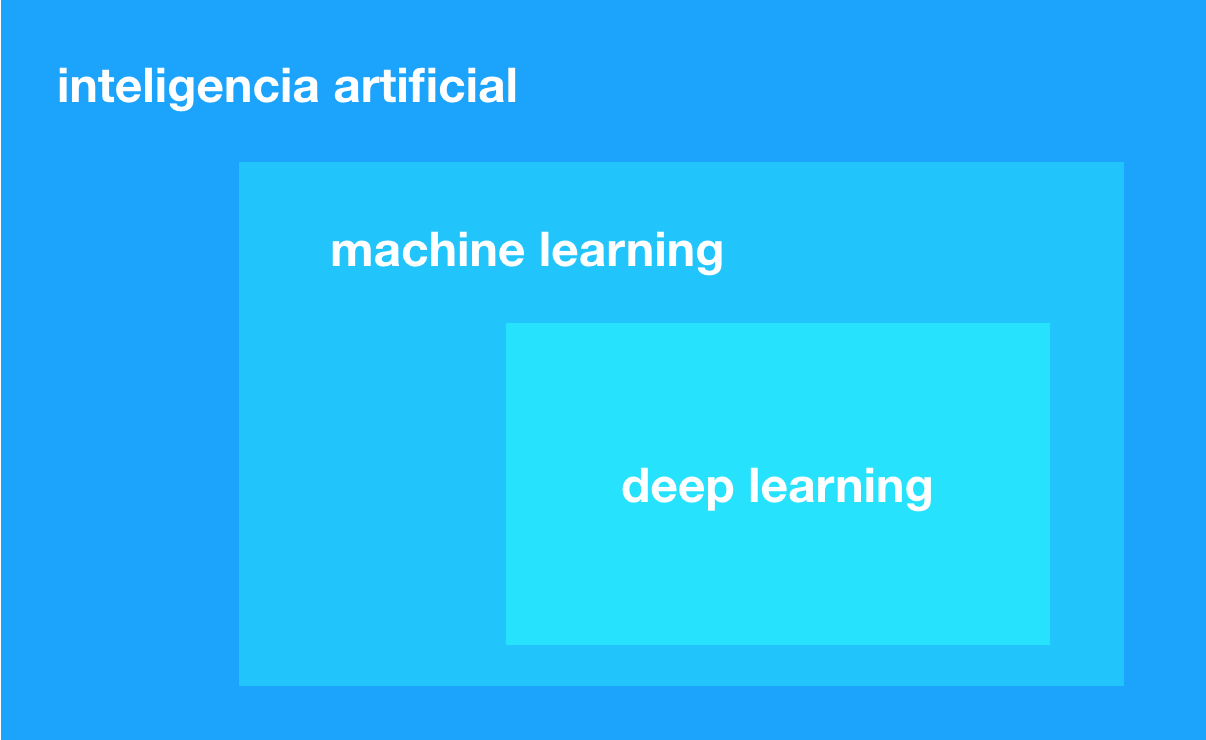

In [116]:
from IPython import display 
display.Image("https://www.salesforce.com/content/dam/blogs/mx/inteligencia-artificial-cuadro.png")

## ¿Qué es Machine Learning?
Machine learning, o aprendizaje automático, es el uso de algoritmos para organizar datos, reconocer patrones y hacer que computadores puedan aprender con esos modelos y generar insights inteligentes sin necesidad de pre-programación.

Machine Learning, maneja algoritmos para analizar datos, aprender de esos datos y tomar decisiones basadas en lo aprendido.

## ¿Qué es Deep Learning?
Deep learning, o aprendizaje profundo, es la parte del aprendizaje automático que, por medio de algoritmos de alto nivel, imita la red neuronal del cerebro humano.

Deep Learning, estructura algoritmos en capas, para crear una red neuronal artificial, capaz de aprender y tomar decisiones por sí misma.

## Semejanzas

Tanto el machine learning como el deep learning imitan la forma de aprender del cerebro humano.

Ambos pueden aprender de forma supervisada o no supervisada.

Más específicamente, el aprendizaje profundo se considera una evolución del aprendizaje automático. Utiliza una red neuronal programable que permite a las máquinas tomar decisiones precisas sin la ayuda de los humanos.

# 2. Comparando CPUs y GPUs para inteligencia artificial

En el mundo de la inteligencia artificial se habla mucho sobre coches autónomos, drones que persiguen un objetivo común  o robots que dan volteretas procesando los datos que obtienen de su entorno. Una de las cosas que tienen en común es la forma de procesar los datos que obtienen de las imágenes. Lo hacen por medio de unidades de procesamiento gráfico (Graphics processing unit – GPUs).

Importante ¿qué es eso de las GPUs? ¿Por qué un coche autónomo no procesa con un microprocesador normal y corriente como un Intel?

In [117]:
import sys
!{sys.executable} -m pip install pytube3

URL: https://youtu.be/Dy0hJWltsyE

In [119]:
from pytube import YouTube

link=input("Inserte el enlace del video: ")
yt=YouTube(link)
lista= yt.streams.all()
for st in lista:
    print(st)

codigo=int(input("digite el itag de la calidad de video que desea: "))

st=yt.streams.get_by_itag(codigo)
st.download("C:\proyectos\youtube")

Inserte el enlace del video: https://youtu.be/Dy0hJWltsyE


HTTPError: HTTP Error 404: Not Found

# GPUs y CPUs:

Básicamente, en los ordenadores normales de hoy en día se pueden utilizar dos unidades de procesamiento para realizar cálculos: por un lado, se encuentran las unidades de procesamiento central (CPUs) y, por otro, las unidades de procesamiento gráfico (GPUs).

### CPUs: 
son los microprocesadores que se han utilizado siempre como unidad de procesamiento. Estos microprocesadores son muy muy buenos haciendo tareas secuenciales, que no se pueden paralelizar. Hay distintas marcas, las más conocidas y que compiten por prácticamente todo el mercado son Intel y AMD.

### GPUs: 
son los procesadores gráficos que tienen las tarjetas gráficas. Se usan muchísimo para gaming, donde los videojuegos se benefician de la manera de procesar matrices que tienen las GPUs. Al fin y al cabo, las imágenes en HD no dejan de ser la unión de matrices de datos… Entre las marcas más conocidas se encuentran Nvidia y AMD.

### Diferencia
La diferencia más importante entre los dos componentes a nivel de arquitectura es el número de núcleos que suelen tener. Las CPUs tienen muchos menos núcleos que las GPUs, lo que hace que para procesamiento paralelo sean peores. Sin embargo, los núcleos de las CPUs son mucho más potentes, por lo que para tareas secuenciales son mucho mejores.



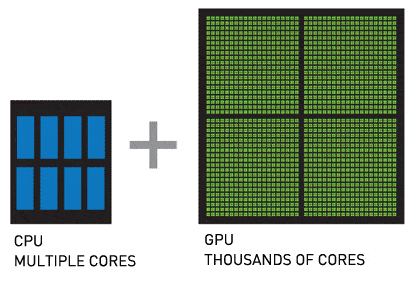

In [120]:
display.Image("http://machinelearningparatodos.com/wp-content/uploads/2019/09/cpu-gpu-difference-core-comp.gif")

Las tarjetas gráficas inicialmente tuvieron como propósito el de servir para procesar imágenes, pero se ha ido aprovechando su potencia para problemas de cálculo matricial. Inicialmente los desarrolladores que usaban la potencia de las GPUs para sus problemas matemáticos tenían que traducir sus problemas a triángulos y polígonos. Afortunadamente, este hecho cambió con la llegada de las arquitecturas CUDA, que permitían usar las GPUs para cálculo paralelo de propósito general.

Actualmente, usando Python, C, Fortran… es posible utilizar CUDA para calcular problemas matemáticos con GPUs. Vamos comparar la capacidad de cómputo de las CPUs y de las GPUs para ver la potencia de las GPUs en cálculos sobre matrices.

## Comparativa de cálculo matricial entre CPUs y GPUs:

Comparacion del rendimiento de una CPU y de una GPU de las que se venden en el mercado. 
Para llevar a cabo esta comparativa he utilizado el siguiente hardware:

CPU: AMD Ryzen 5 3600.

GPU: Asus Geforce GTX 1060

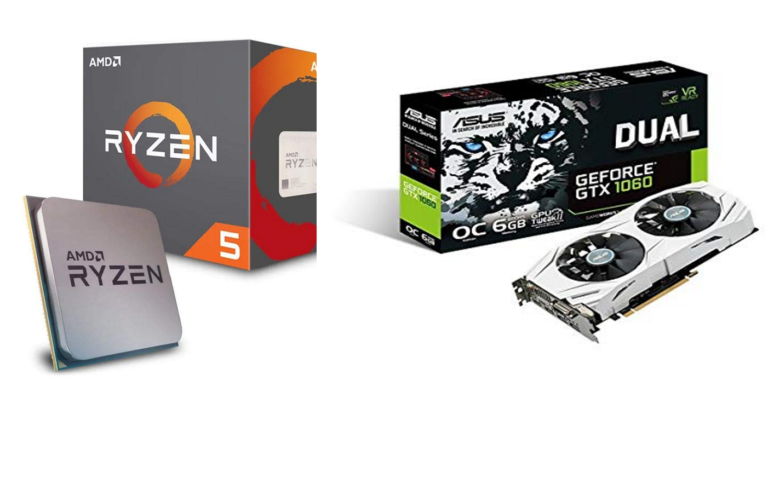

In [121]:
display.Image("https://machinelearningparatodos.com/wp-content/uploads/2019/09/micro_gpu-768x490.png")

El código usado para la comparativa es el siguiente:

In [123]:
import sys
import numpy as np
import tensorflow as tf
from datetime import datetime

def prueba_dispositivo(nombre_dispositivo, tamanio_matriz):
    '''
    Calcula el tiempo consumido en hacer multiplicaciones 
    matriciales usando un dispositivo y un tamaño de filas y 
    columnas de la matriz aleatoria
 
    :param nombre_dispositivo: nombre del dispositivo reconocible
                               para tensorflow
    :param tamanio_matriz: número de filas y de columnas de 
                           la matriz aleatoria

    Ejemplo:

             prueba_dispositivo(&quot;/cpu:0&quot;, 100)
    '''
    dimension=(int(tamanio_matriz),int(tamanio_matriz))

    with tf.device(nombre_dispositivo):
        random_matrix = tf.random_uniform(shape=dimension, 
                            minval=0, maxval=1, seed=1993)
        dot_operation = tf.matmul(random_matrix, 
                           tf.transpose(random_matrix))
        sum_operation = tf.reduce_sum(dot_operation)

    inicio = datetime.now()
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) 
                                         as session:
            result = session.run(sum_operation)
    tiempo_consumido = datetime.now() - inicio
    return tiempo_consumido

resultados = {'CPU':[], 'GPU':[]}
for tamanio_matriz in np.geomspace(10, 15000, num=200):
    resultados['CPU'].append(prueba_dispositivo(&quot;/cpu:0&quot;, 
                                                tamanio_matriz))
    resultados['GPU'].append(prueba_dispositivo(&quot;/gpu:0&quot;, 
                                                tamanio_matriz))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 33)

El articulo explicaba que es problema simple de multiplicación de matrices en función del tamaño de las mismas. En este caso se generan las mismas matrices para ambos componentes (así se elimina el sesgo aleatorio de generación de datos) y se calcula el tiempo de procesamiento que consume cada uno de los dispositivos.

Los resultados del análisis de rendimiento que he conseguido los podemos ver en la siguiente representación:

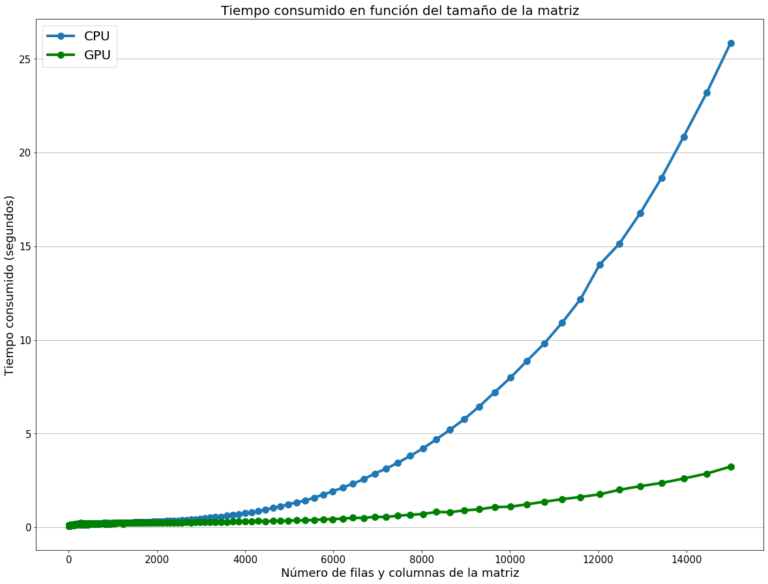

In [124]:
display.Image("https://machinelearningparatodos.com/wp-content/uploads/2019/09/benchmarkt_cpu_gpu-768x584.png")

Como se observa, inicialmente cuando la matriz es muy pequeña no hay diferencia entre procesar con CPUs o con GPUs. Sin embargo, a medida que aumenta el tamaño de las matrices, el tiempo consumido por la CPU aumenta de manera exponencial, no así en el caso de las GPUs. El tiempo máximo de las CPUs en este experimento es de 25 segundos y la diferencia ya empieza a ser muy notoria si comparamos con las GPUs. La diferencia para matrices mucho más grandes es abismal, siendo las GPUs claras ganadoras para procesamiento matricial en paralelo. Muy útiles además de para procesamiento de redes convolucionales, para el procesamiento de muchos datos donde los cálculos matriciales sean una norma.

## Por lo que el hardware es importante- Qué PC debo comprar para deep learning?

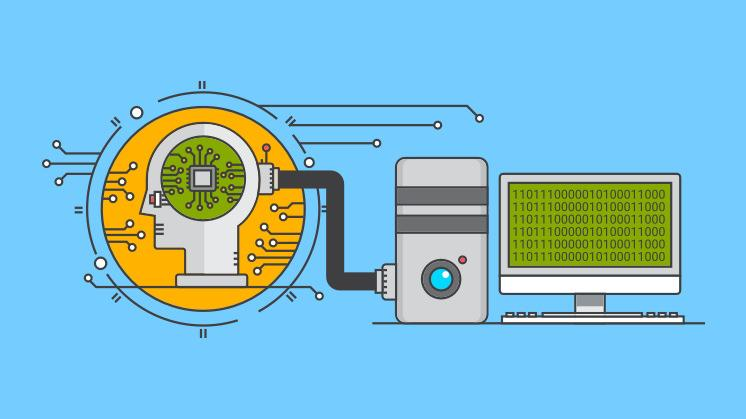

In [125]:
display.Image("https://hardzone.es/app/uploads-hardzone.es/2021/05/Machine-Learning-1.jpg")

#### Identificar el Hardware relevante
La parte más importante en la Inteligencia Artificial es la tarjeta gráfica sin ninguna duda, por ello aquí ser irá la mayor parte del coste de nuestro ordenador. Sin duda, partes como la CPU o la memoria RAM son también importantes, aunque con el trabajo que están haciendo los de Rapids.ai cada vez lo son menos.

Rapids.ai es un conjunto de librerías open source en las que NVidia es uno de los grandes inversores, y ha desarrollado todas las librerías más famosas de Machine Learning en GPU. Esto quiere decir que paquetes como Pandas, Numpy, Scikit-Learn, Spark, etc. Han sido copiados por ellos y adaptados a la GPU e incluso mejorados algunas funciones, por lo que nos resultará fácil y sencillo adaptarnos, consiguiendo tiempos de operaciones hasta 1000 veces más rápidos en GPU que en CPU con las bibliotecas originales (dependerá de la operación que se realice). Por ello la GPU cobra aún más relevancia en detrimento de otros elementos de Hardware.

Para todos los elementos voy a escoger tres opciones:

### GPU
High-tier: 2x Titan RTX (24GB VRAM / 4608 Cores / 576 Tensor / 3000.95€)

Mid-tier: 2x RTX 2080 TI (11GB VRAM / 4352 Cores / 544 Tensor / 1.229,90€)

Low-tier: 2x RTX 2070 SUPER (8GB VRAM / 2560 cores / 320 Tensor / 521.90€)

#### ¿Por qué dos?:
Los conjuntos de datos de Deep Learning suelen ser muy pesados, por lo que es importante poder paralelizar. En la mayoría de los casos dos GPU RTX 2070 SUPER funcionarán mejor que una RTX 2080 TI.

#### Mezclar tarjetas gráficas!: 
Esto no es buena idea, ya que si tenemos una GPU más potente que otra, la que sea más potente deberá acabar a que finalice la otra, por lo que no tendremos ningún beneficio de la tarjeta más potente. Es cierto que se puede calcular y dividir la carga de trabajo adaptándola a cada GPU, pero el tener que calcular y programar esto constantemente no merece la pena. Lo mejor es tener dos gráficas iguales.

#### ¿Qué característica es la más importante de las GPUs?:
Para el Deep Learning lo más importante es la memoria de la GPU. Cuanta más memoria, podremos entrenar cantidades más grandes de datos a la vez (batch) por lo que ahorraremos mucho tiempo.

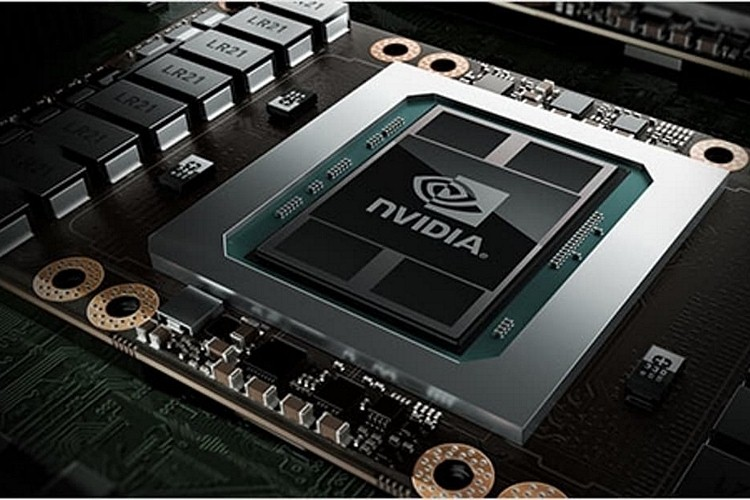

In [126]:
display.Image("https://observatorio-ia.com/wp-content/uploads/2018/11/nvidia_gpu.jpg")

#### Principales marcas de GPU en el mercado
Las dos grandes marcas en este mercado son NVIDIA y AMD, aunque cada vez es más popular la computación en la nube, gracias a la aparición de Amazon Web Services (AWS) y de las TPU (Tensor Processing Unit) de Google Cloud Platform.

##### NVIDIA
NVIDIA es el líder absoluto en la venta de GPU. Por una parte, sus librerías estándar te permiten trabajar con CUDA, una plataforma de computación paralela mucho más potente que OpenCL (la que utiliza AMD).

Por otra, entre sus librerías hay una especializada en deep learning: NVIDIA CUDA Deep Neural Network library (cuDNN) .

Esta gran ventaja inicial viene acompañada, además, de un buen soporte. Y es que CUDA cuenta con una comunidad muy extensa, gracias a la cual podremos encontrar información sobre prácticamente cualquier problema que tengamos.

##### AMD
Sus GPU son potentes y de calidad, pero no son compatibles con CUDA y eso es una gran desventaja. En su lugar, AMD trabaja con OpenCL y la plataforma ROCm.

ROCm utiliza HIP para poder unificar las GPU de cada tipo en un mismo lenguaje. Sin embargo, aunque la idea es buena, resulta muy tedioso parsear el codigo escrito en TensorFlow y Pytorch al lenguaje que propone AMD.

Hace poco tiempo que TensorFlow es compatible con las GPU de AMD y, si bien ya es posible ejecutar la mayoría de los modelos, crear uno nuevo todavía puede dar muchos problemas.

Además, la comunidad de ROCm no es tan extensa y, por lo tanto, no hay tanta información a la hora de resolver problemas.

### Comparativas de las principales GPU

Los resultados de las pruebas con diferentes GPU son los siguientes:

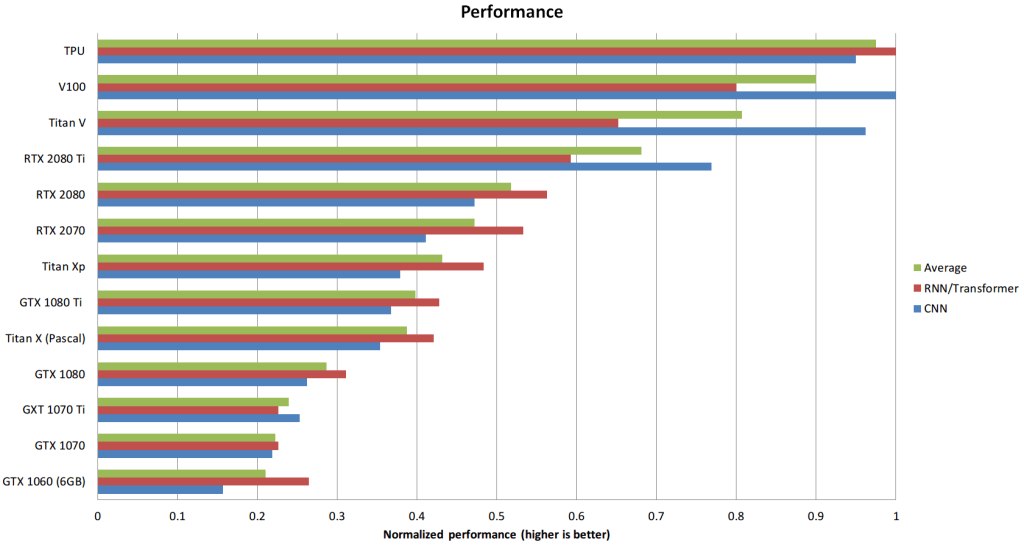

In [127]:
display.Image("https://observatorio-ia.com/wp-content/uploads/2018/11/rendimiento_GPU.png")

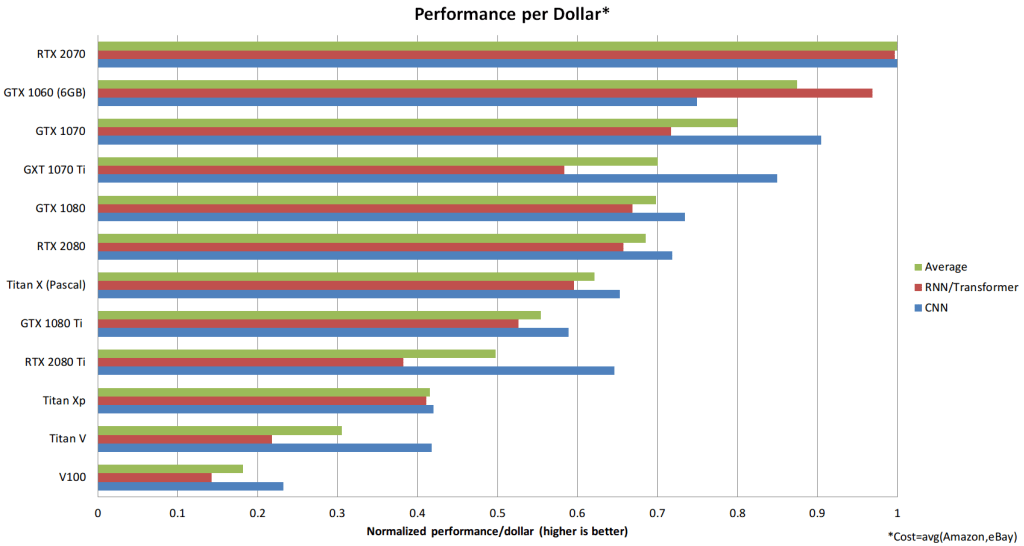

In [128]:
display.Image("https://observatorio-ia.com/wp-content/uploads/2018/11/coste_rendimiento_GPUs.png")

### Cuál elegir
Como se puede ver en la gráfica anterior, la RTX 2070 es la GPU con mejor calidad/precio (gracias a la posibilidad de la computación con 16-bits).

### ¿Tensores?: 
La diferencia entre los cores (CUDA cores) y los tensores (tensor cores) se resume en la velocidad y la precisión. Los CUDA cores realizan un cálculo por revolución de GPU, por lo que la velocidad de reloj (clock speed) y la cantidad de CUDA cores disponibles juegan un papel fundamental a la hora de tener más potencia. Por otro lado los Tensor cores realizan una operación matricial 4x4 por cada revolución, teniendo un insignificante ajuste de precisión. Como las redes neuronales realizan diferentes operaciones matriciales, esto es una gran ventaja, si bien aun está en desarrollo y no siempre sale rentable, es un parámetro a tener en cuenta. Por lo que muestro un par de imagenes de Nvidia que resume lo anterior.

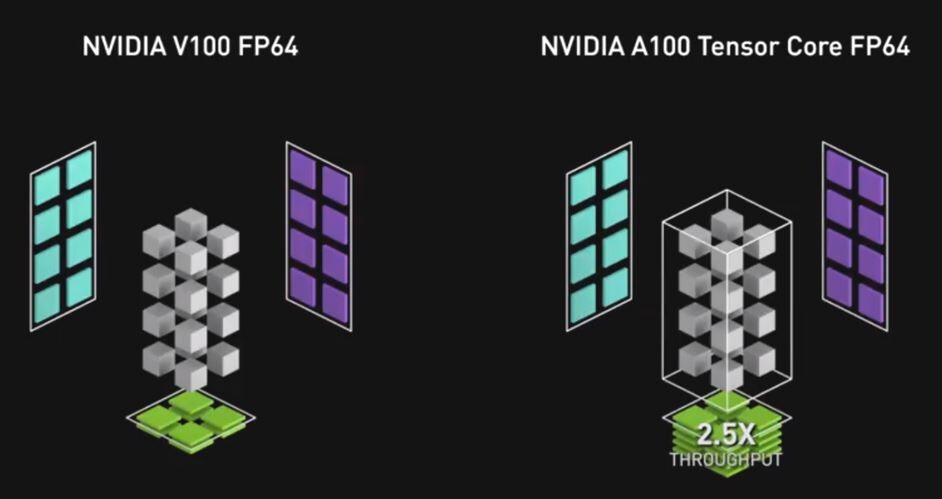

In [131]:
display.Image("https://www.techpowerup.com/img/YlExJAoTwIdzFyuq.jpg")

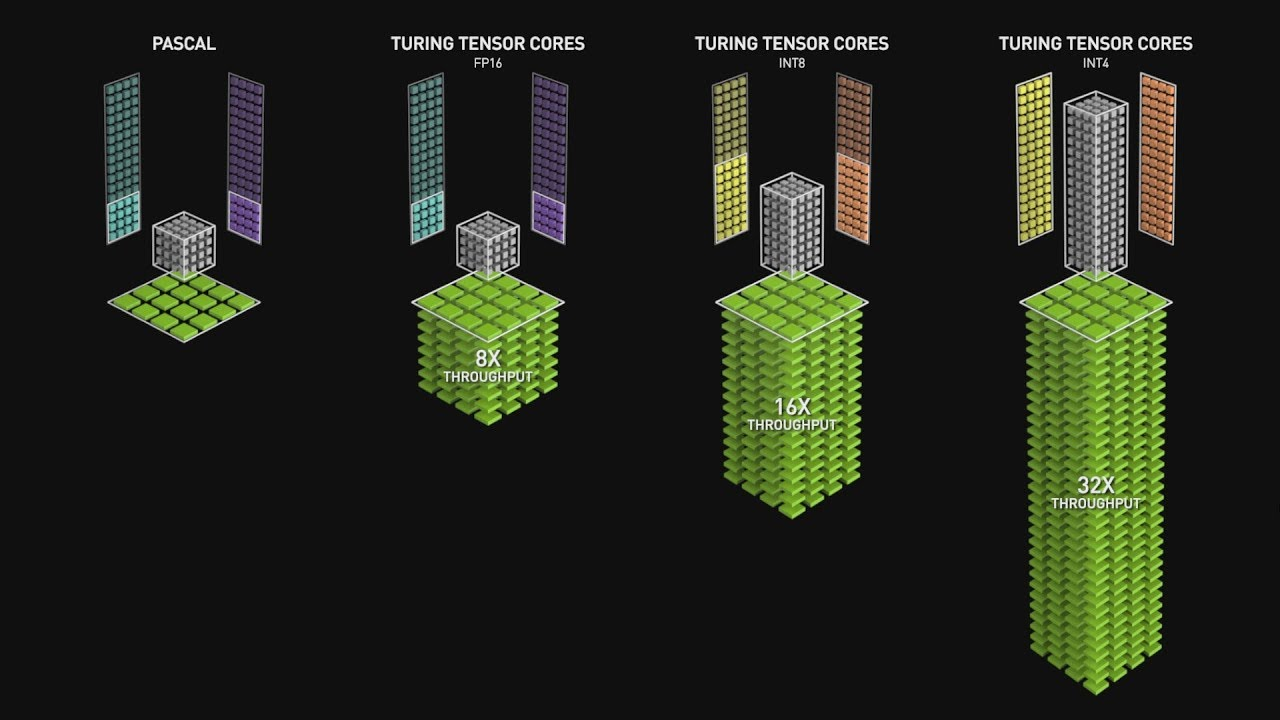

In [132]:
display.Image("https://i.ytimg.com/vi/yyR0ZoCeBO8/maxresdefault.jpg")

Dato Importante: Cada dos años, NVIDIA saca a la venta una serie de GPUs, siendo la serie 20 la familia actual de tarjetas gráficas. Dentro de esta serie, el modelo con memoria y velocidad de procesamiento más rápido es la 2080 Ti con 13.45 TFLOPs (billones de operaciones por segundo) y 11 GB de memoria GDDR6. Su precio es de aproximadamente 1300€.

### CPU

El procesador, si bien no es de lo más importante, si que necesitamos tener una CPU lo suficientemente potente como para mover datos y que no se creen cuellos de botella, además de que se pueda preprocesar los datos correctamente en caso de que no se pueda hacer con la CPU.

High-tier: AMD Ryzen Threadripper 3970X (24 Nucleos / 48 hilos / 4.5GHz / 1806.90€)
    
Mid-tier: AMD Ryzen Threadripper 2950X (16 Nucleos / 32 hilos / 3.5GHz / 676.63€)
    
Low-tier: AMD Ryzen Threadripper 1900X (8 Nucleos / 16 hilos / 3.8GHz / 178.83€)

Durante el entrenamiento de redes neuronales, una de las funciones más importantes de la CPU es la de ejecutar todas las operaciones del “camino” de datos que va desde la lectura de un dato en el disco duro, hasta mover los datos a la GPU para que se ejecuten las operaciones de la red convolucional.
    

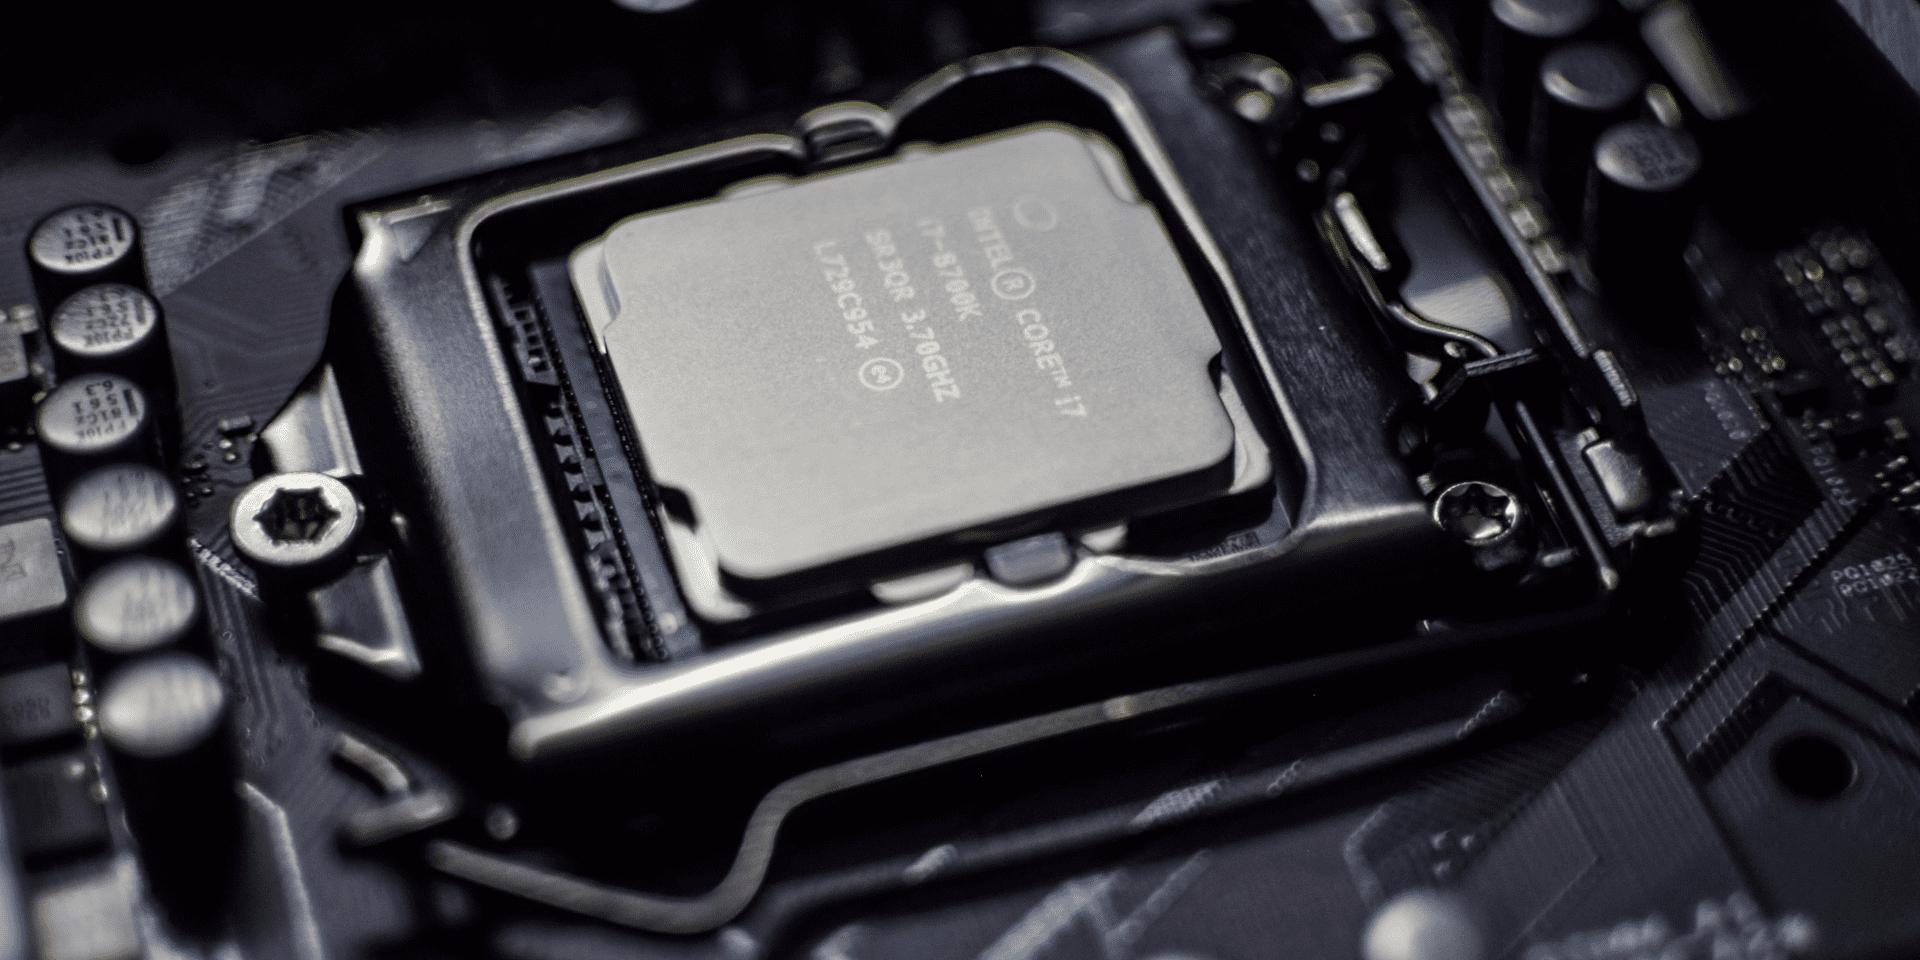

In [133]:
display.Image("https://modeliza.me/static/d38dabdcd9bab8a9765374d1c2fa5524/29114/cpu.png")

Con cualquiera de las anteriores configuraciones super bien, ya que tienen un número de PCI lanes y de potencia suficiente como para mover las tarjetas gráficas requeridas.

### Por qué no hay Intel? 
Aunque es verdad que los procesadores Intel tienen mejores adaptaciones al Machine Learning, aquí realmente los trabajos pesados se los damos a la GPU y la CPU solo hará algunas labores de preprocesado (en el caso de que no usemos las librerías de Rapids.ai) y de carga de datos. Aunque los procesadores Intel tienen más potencia por hilo, al no necesitar tanta potencia, si no carga de trabajo es mejor tener más hilos que es lo que ofrece AMD, además a un mejor precio.
### ¿Que son PCI Lanes? 
Sin entrar en demasiado detalle, son las lineas de comunicación que tiene la CPU con el ordenador, esto quiere decir con la placa base, las GPUs, etc. A más carga de datos, más PCI Lanes se necesitarán, ya que si no se pueden formar cuellos de botella, al estar las dos GPUs pidiendo datos, pero la CPU no es capaz de suministrarlos a la velocidad adecuada.

Dato Importante: En cuanto a marcas, el fabricante líder en cuota de mercado es Intel. Esta marca saca a la venta una generación de CPUs nuevas cada año, y actualmente van por la generación 10. Cada generación tiene 3 modelos principales llamados i3, i5, e i7 ordenados de menor a mayor rendimiento respectivamente. Además debes tener cuidado ya que cada modelo tiene variantes, por ejemplo, algunas variantes del procesador i7 son i7-10700, que no permite cambiar la frecuencia de reloj, y i7-10700k que si lo permite. El procesador i7-10700k tiene un precio aproximado de 440€, lo que nos deja con un total de 1740€ hasta el momento.

### RAM

La RAM es importante sobre todo para procesado de datos y preprocesado de datos (no tanto si usamos la GPU), es importante tener una gran cantidad de RAM, ya que puede que no todo el procesado lo podamos hacer con las GPUs.

High-tier: CORSAIR Vengeance LPX 32 (32gb / 2666Mhz / CL 16 / 149.87€)
    
Mid-tier: 8x HyperX Fury HX426C16FB3/8 (8GB / 2666MHz / CL 16 / 34€)
    
Low-tier: 4x HyperX Fury HX426C16FB3/8 (8GB / 2666MHz / CL 16 / 34€)

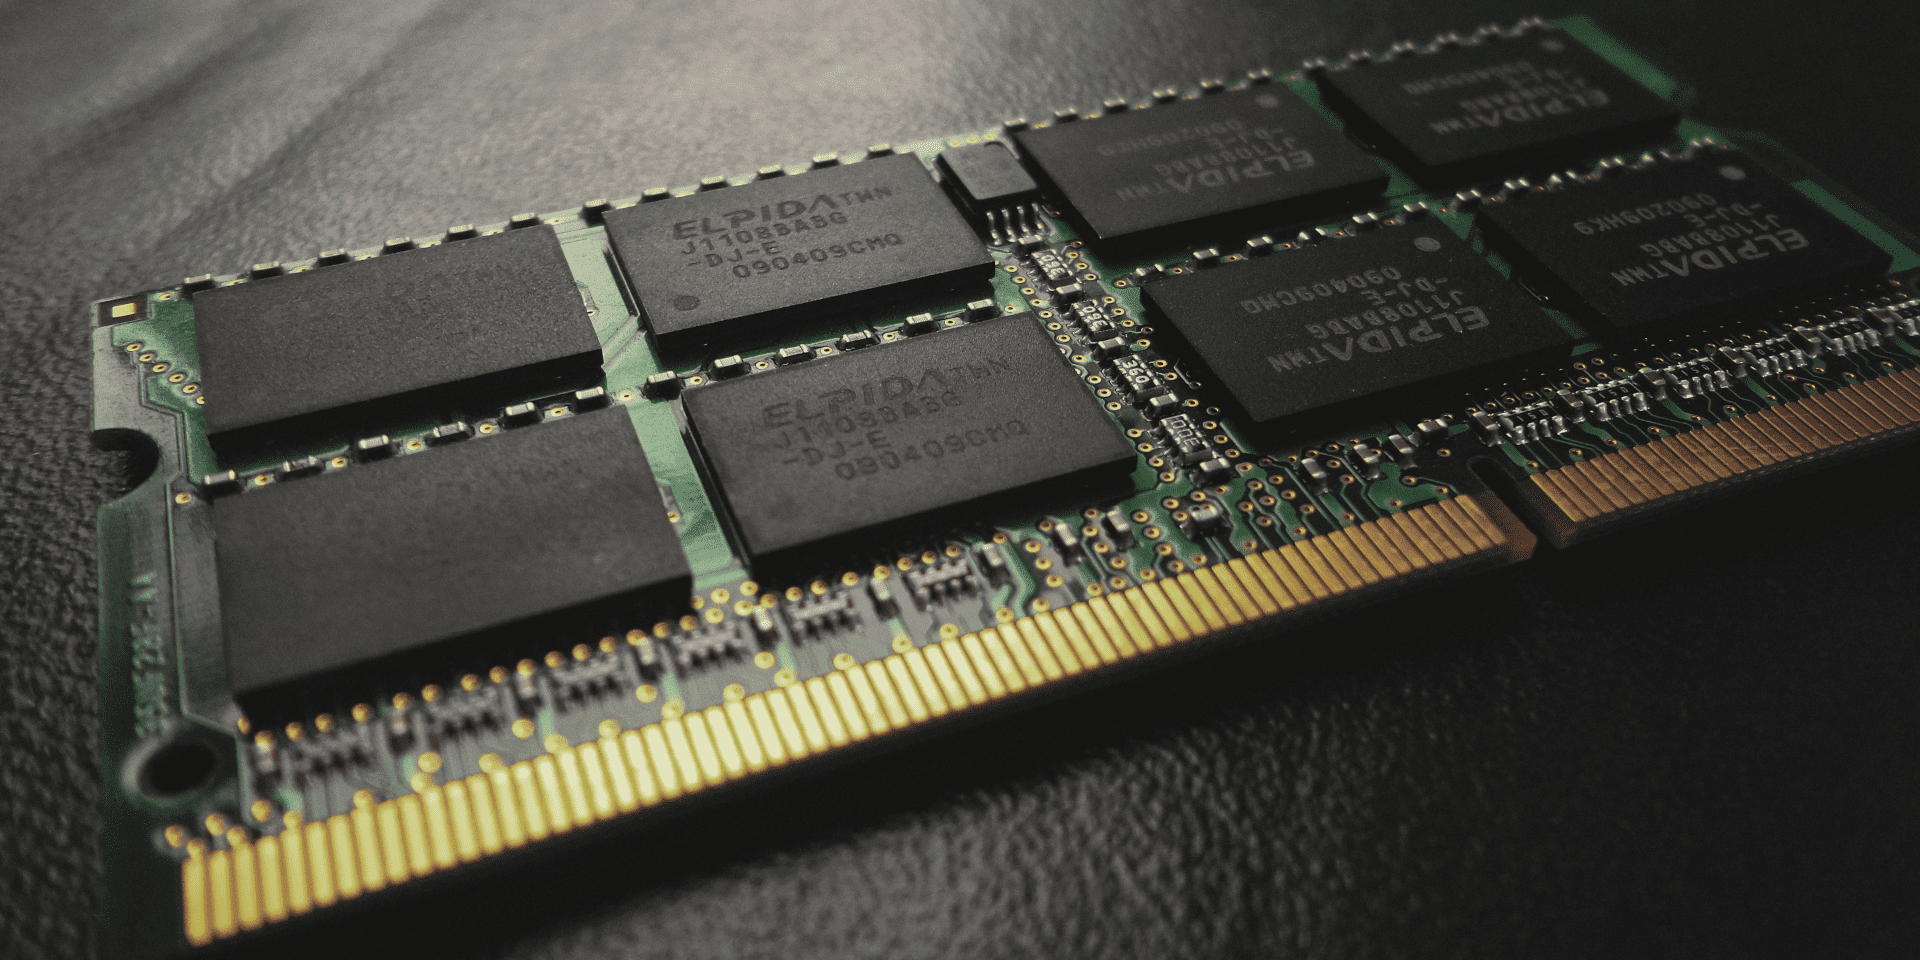

In [134]:
display.Image("https://modeliza.me/static/cb374ee859038539d74d539d74829a46/29114/ram.png")

Dependiendo de la cantidad de datos que desees procesar puede que las distintas configuraciones sean ajustadas, dependerá de los datos que tengas. Sin ninguna duda, lo más importante de una RAM para realizar Inteligencia Artificial es la cantidad de memoria.

#### ¿Por qué no escoges RAMs con mayor velocidad de reloj, o más MHz?

Es un gasto innecesario que no aporta velocidad, (perdon por el comentario). Pero  tanto Intel como AMD en sus propias CPUs declaran que no soportan más de 2667MHz por tanto todo lo que sea superior a esto será un gasto de dinero, ya que la CPU hará cuello de botella y la RAM no podrá entregar los datos, todo lo rápido que quiera. Aunque hicieramos overclock a la CPU para que soporte entregas más rápidas, la velocidad no variara en más de algunos segundos tras horas de entrenamiento de nuestros modelos. Tan solo es Marketing de las marcas para vender un producto mejor, más caro, pero que no necesitamos. (salvo que realices Overclocking al procesador).

En resumen, lo mas impportante de la Memoria RAM es su capacidad de almacenamiento.

### Tarjeta Madre (Placa Base)

Tenemos que escoger una placa base que sea compatible con el tipo de ordenador que queremos armar, de hecho, está debe ser nuestra primera decisión a tomar, que placa base vamos a escoger, y a partir de ahí, elegir, CPU, GPU, RAM, etc.

High-tier: ASUS Prime TRX40-Pro (STRX4 / ATX / 256 max RAM / PCI-E 16 / 449.95€)
    
mid-tier: ASRock x399 Phanton Gaming: (STR4 / ATX / 128 max RAM / PCI -E 16 / 244,89€)
        
low-tier: ASRock x399 Phanton Gaming: (STR4 / ATX / 128 max RAM / PCI -E 16 / 244,89€)

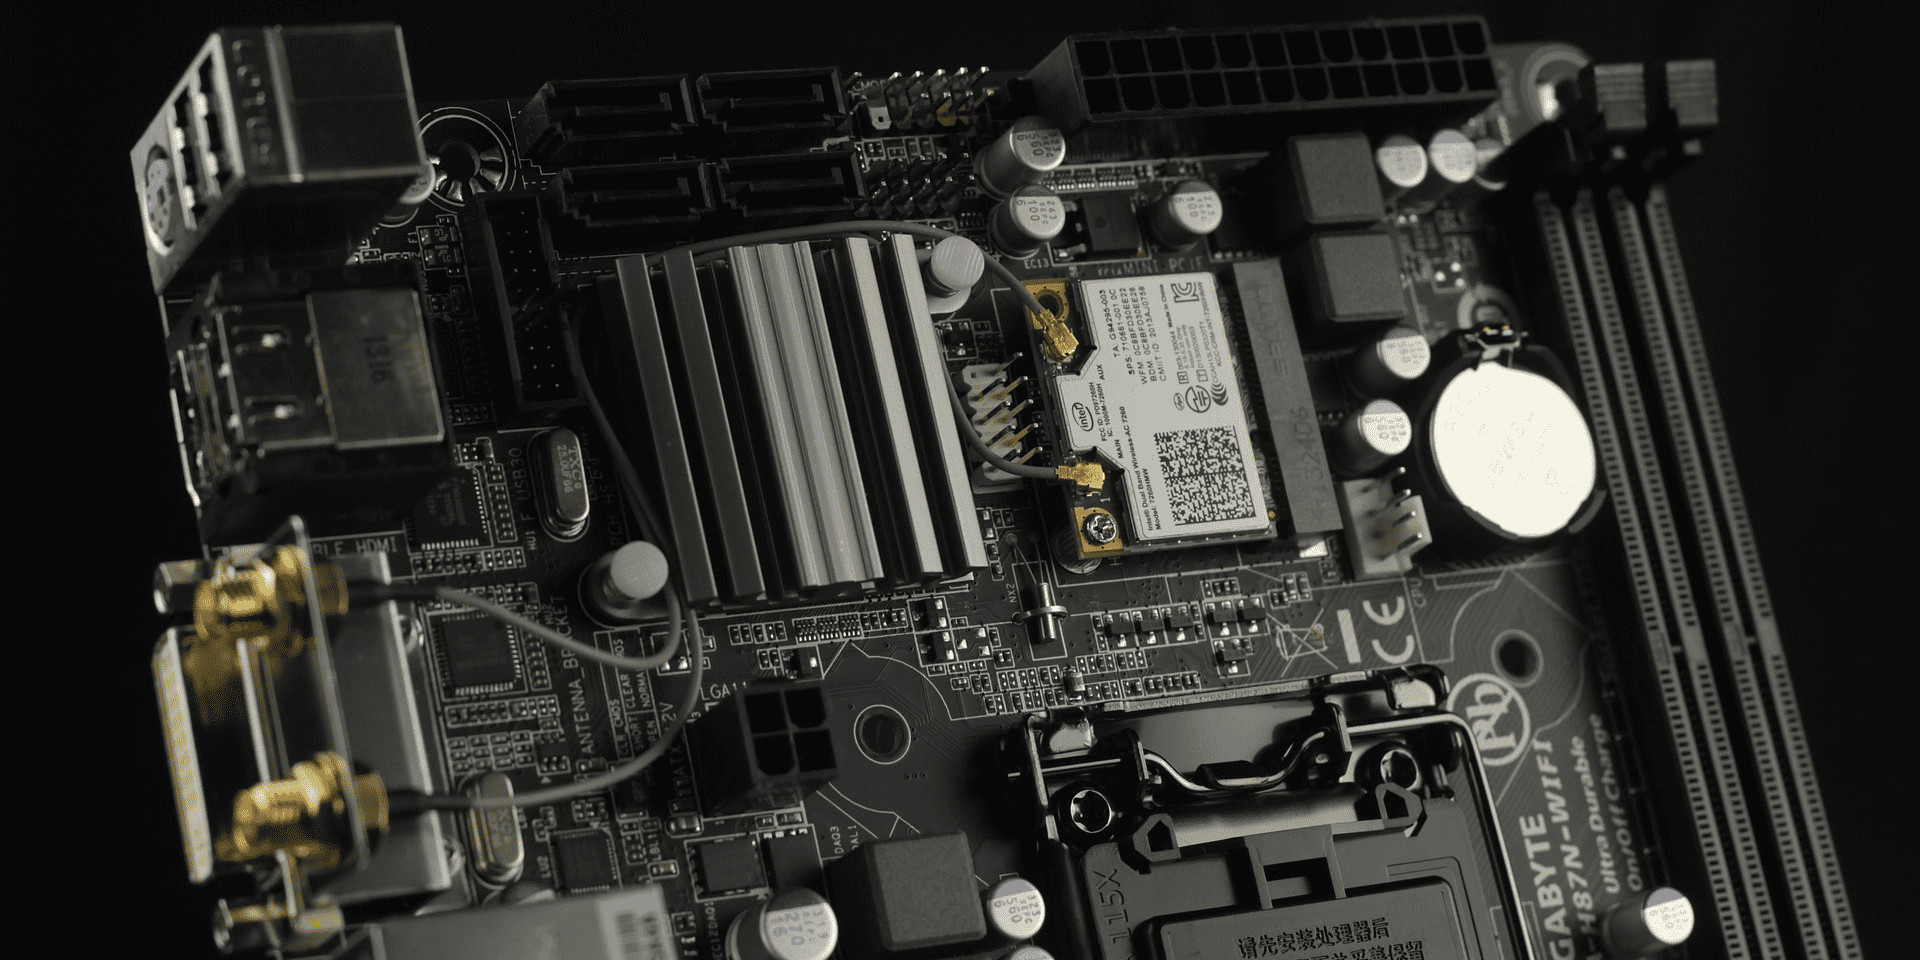

In [135]:
display.Image("https://modeliza.me/static/e7bfb53eb914525517d94331dec181ed/29114/motherboard.png")

#### Que factores han de tenerse en cuenta al elegir una Placa Base?
Son varios, menciono los fallos comunes que se suelen cometer:
Que el Socket soporte la CPU que le queremos poner (es decir que CPU y Placa Base sean compatibles)
Que soporte toda la memoria RAM que le queremos poner y el tipo de memoria RAM (DDR4)
Que soporte las dos GPUs que queremos poner

Para desarrollar toda la potencia de las dos GPUs que las PCIe Lanes sean de 16x.

¿Por qué escogemos esta para todas?

Porque es la más barata en el mercado, y cumple con todos los requerimientos anteriores. Calidad / precio inmejorable

Tambien podemos elegir la placa base MPG Z490 Gaming Plus de MSI. Esta placa base cumple todos los requisitos, usa el chipset Z490 compatible con la serie 10 de Intel, tiene una ranura x16 funcionando en modo x16 (aunque la segunda ranura x16 funciona en modo x4), y tiene 4 ranuras para memoria RAM DDR4. Esta placa base cuesta 190€.

### Disipador 

Que la CPU tenga la ventilación requerida es algo necesario para su desempeño. Muchas personas inexpertas en montar sus propios equipos gastan grandes cantidades de dinero en una buena CPU y luego escogen un refrigerador barato que hace que la CPU no pueda ir al 100% de su rendimiento porque se sobre calienta

High-tier: Cryorig A40 (refrigeración liquida / 2200 RPM / 240mm / 98,45€)
    
Mid-tier: Cryorig A40 (refrigeración liquida / 2200 RPM / 240mm / 98,45€)
    
Low-tier: ARCTIC Freezer 50 TR (refrigeración por aire / 1800 RPM / 69.99€)

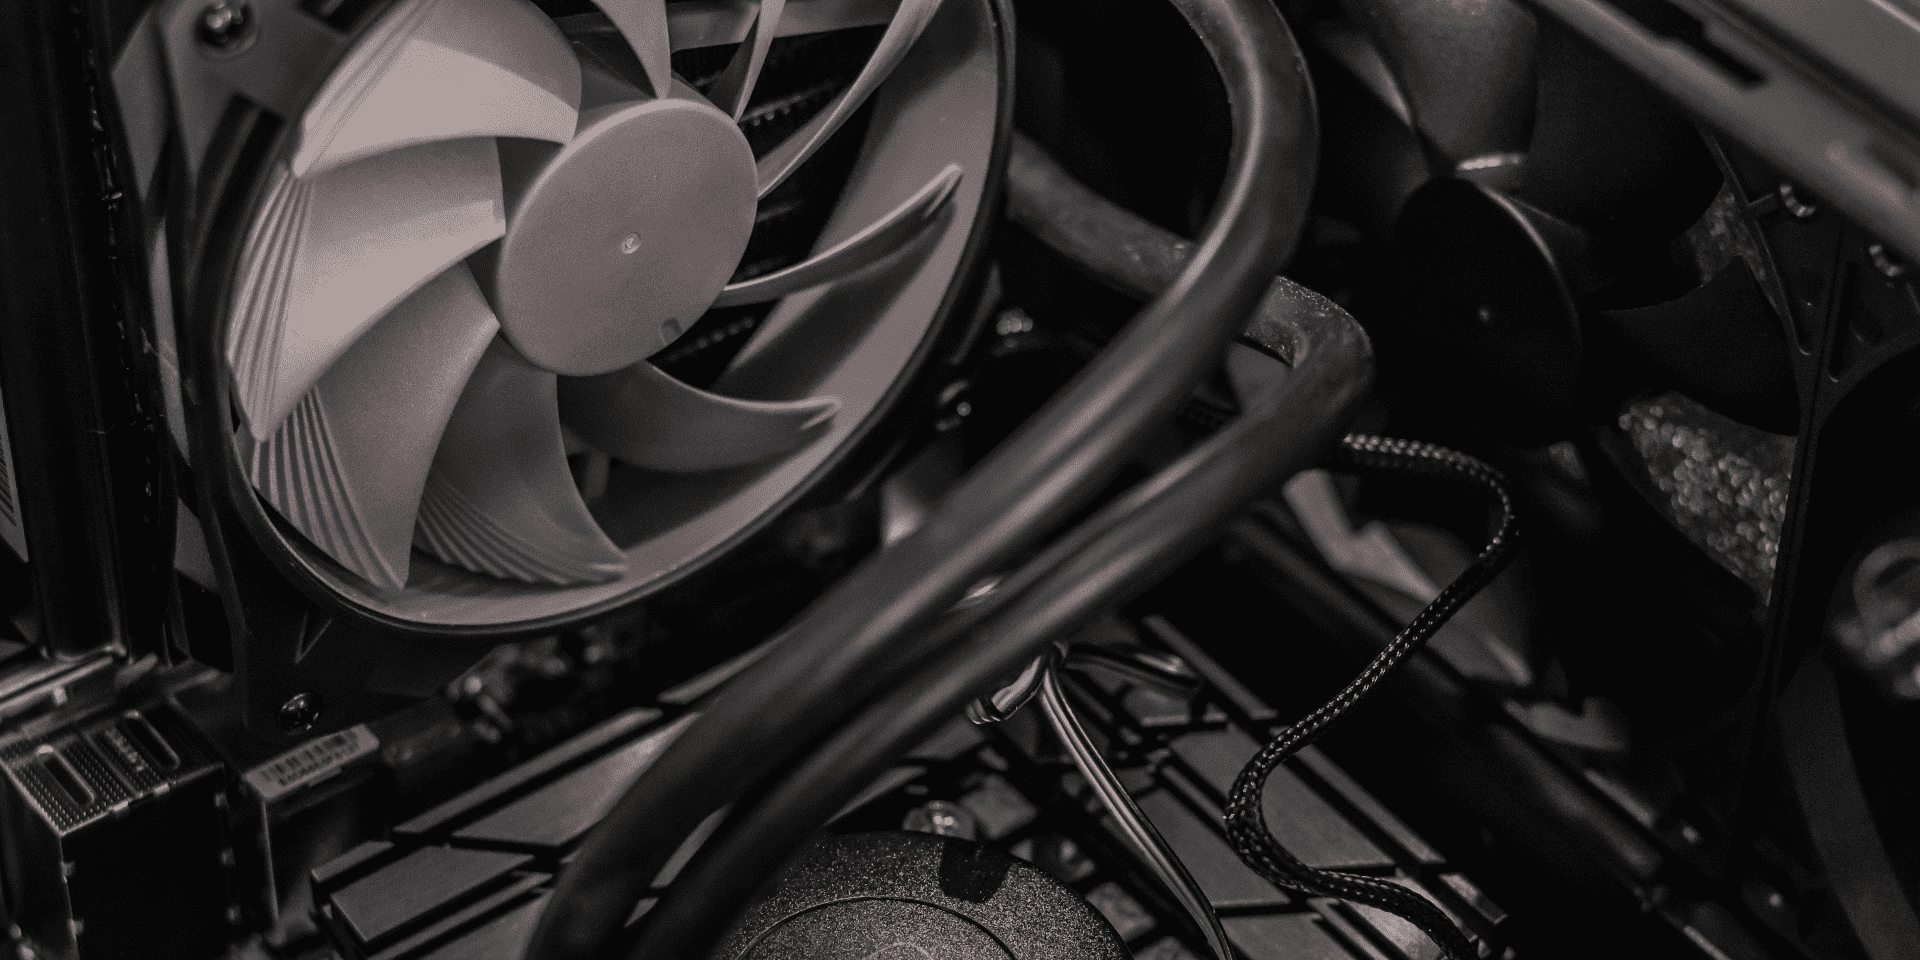

In [136]:
display.Image("https://modeliza.me/static/513bd61ed95e346f06f8baec6f68150c/29114/cooling.png")

Básicamente tanto la opción intermedia, como la alta tienen suficiente refrigeración con un ventilador de esas características, no es necesario gastarnos más dinero. 
Por eso tienen la misma.
Otro aspecto importante es que sea compatible con la CPU y Placa Base, para que no nos encontremos con problemas

Una alternativa adicional son los disipadores de terceros, o los kits de refrigeración líquida. Estos componentes ofrecen un mayor rendimiento en la refrigeración de la CPU, y hacen menos ruido. Además, si quieres hacer overclocking, un kit de refrigeración líquida te permitirá empujar el rendimiento un poco más.

Un buen kit de refrigeración líquida es el Hydro H100x de Corsair. Este kit tiene un precio aproximado de 90€

### Disco Duro

Hay datasets con una cantidad de datos inmensas, y que ocupan una gran cantidad de espacio, por ejemplo el dataset de IMAGENET tan famoso y utilizado para poner a prueba y entrenar distintas arquitecturas de redes neuronales ¡Ocupa más de 150GB!. Demadiado espacio, por ello necesitaremos una gran cantidad de almacenamiento.

High-tier: Samsung 860 EVO 4TB (SSD / 550mbs / 571.90€)
    
Mid-tier: Samsung 860 EVO 2TB (SSD / 550mbs / 251.24€)
    
Low-tier: Samsung 860 EVO 1TB (SSD / 550mbs / 130€)

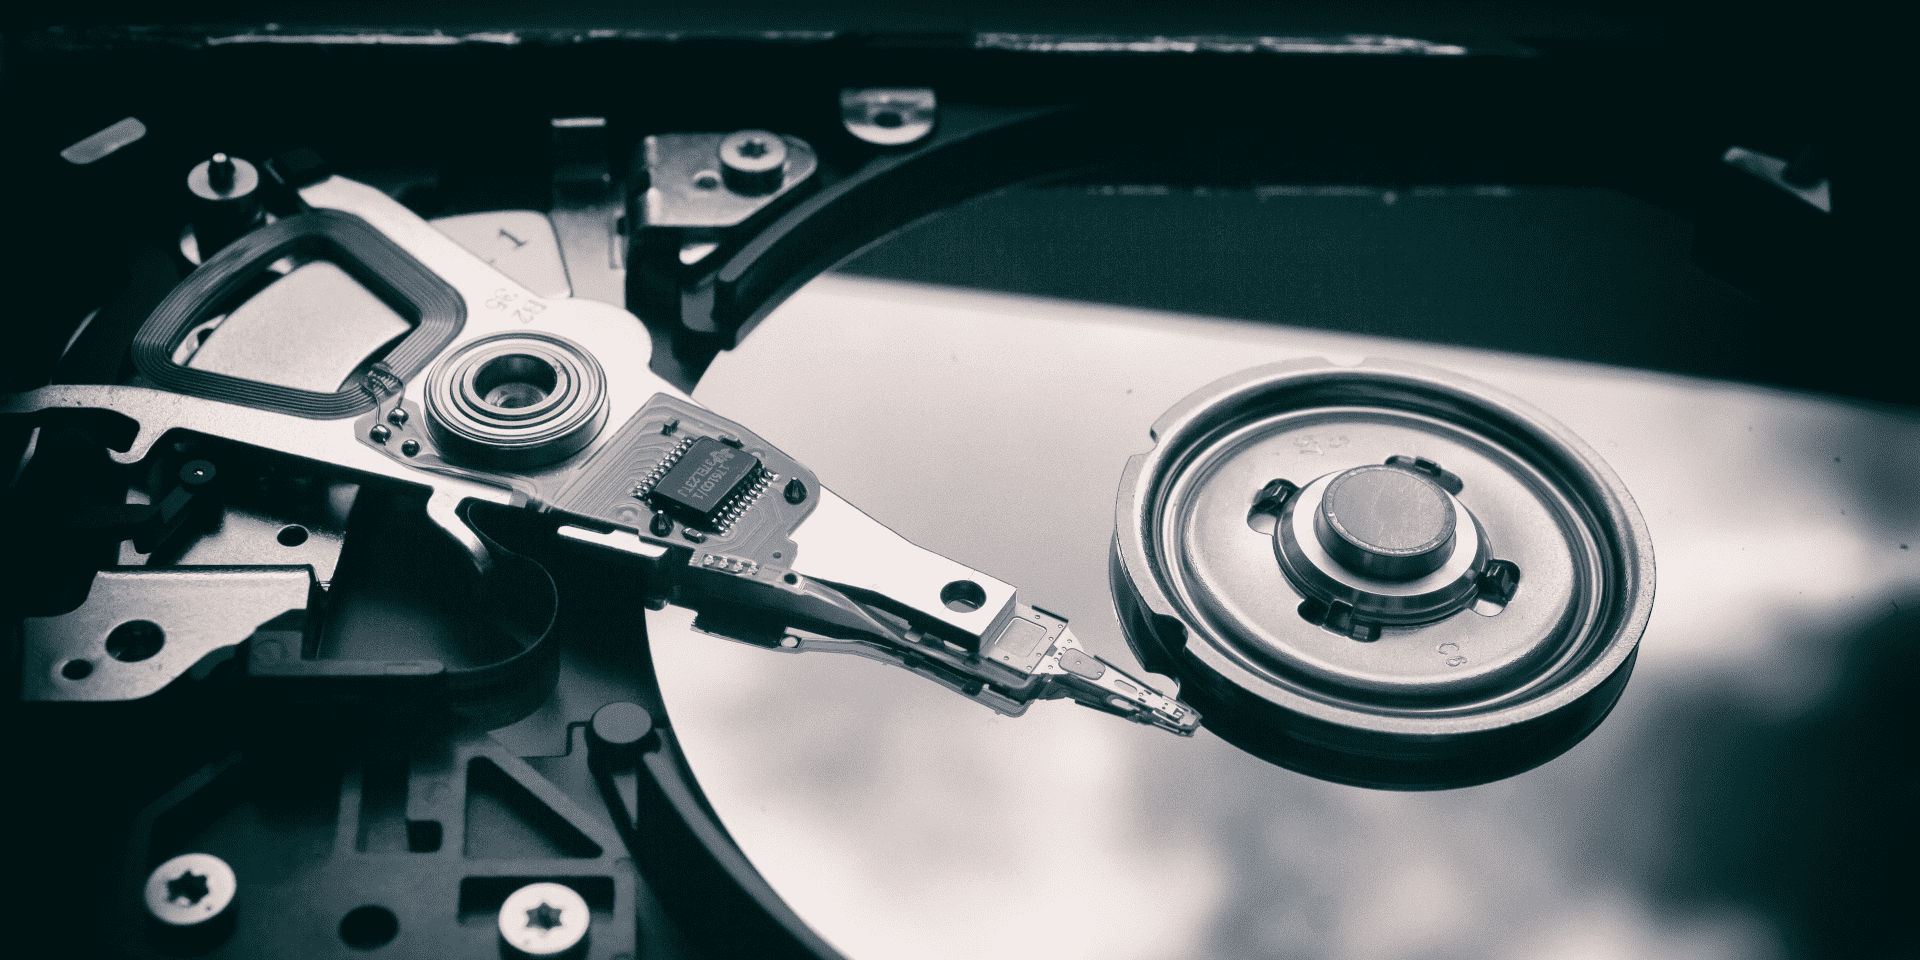

In [137]:
display.Image("https://modeliza.me/static/28afb658f725d8a665307f7948ad6405/29114/hdd.png")

El disco duro se usa para guardar los datos de entrenamiento. Tradicionalmente, la métrica que más se comprobaba en los discos duros era su capacidad de almacenamiento. Esto cambió con la llegada de los discos duros de estado sólido, que aumentan considerablemente la velocidad de lectura y escritura de datos.

Lo importante es que la memoria sea SSD para que haya un rápido acceso a los datos y el disco duro no ralentice el resto de componentes

### Fuente de alimentación

En los tres casos al tener dos GPU y CPU de alta calidad, nuestros ordenadores van a necesitar buenas fuentes de alimentación que provean de la energía suficiente para poder funcionar, es un fallo muy común en novatos no hacer cálculos de la potencia necesaria y de la certificación de la fuente de alimentación. Si no tenemos estos factores en cuenta el equipo no funcionará.

High-tier: SilverStone SST-ST1500-TI (1500W / 80+ titanium / 345.50€)

Mid-tier: Corsair HX1200 (1200W / 80+ platinum / 287.38€)

Low-tier: Lepa B1000 MaxBron (1000W / 80+ bronze/ 95.99€)

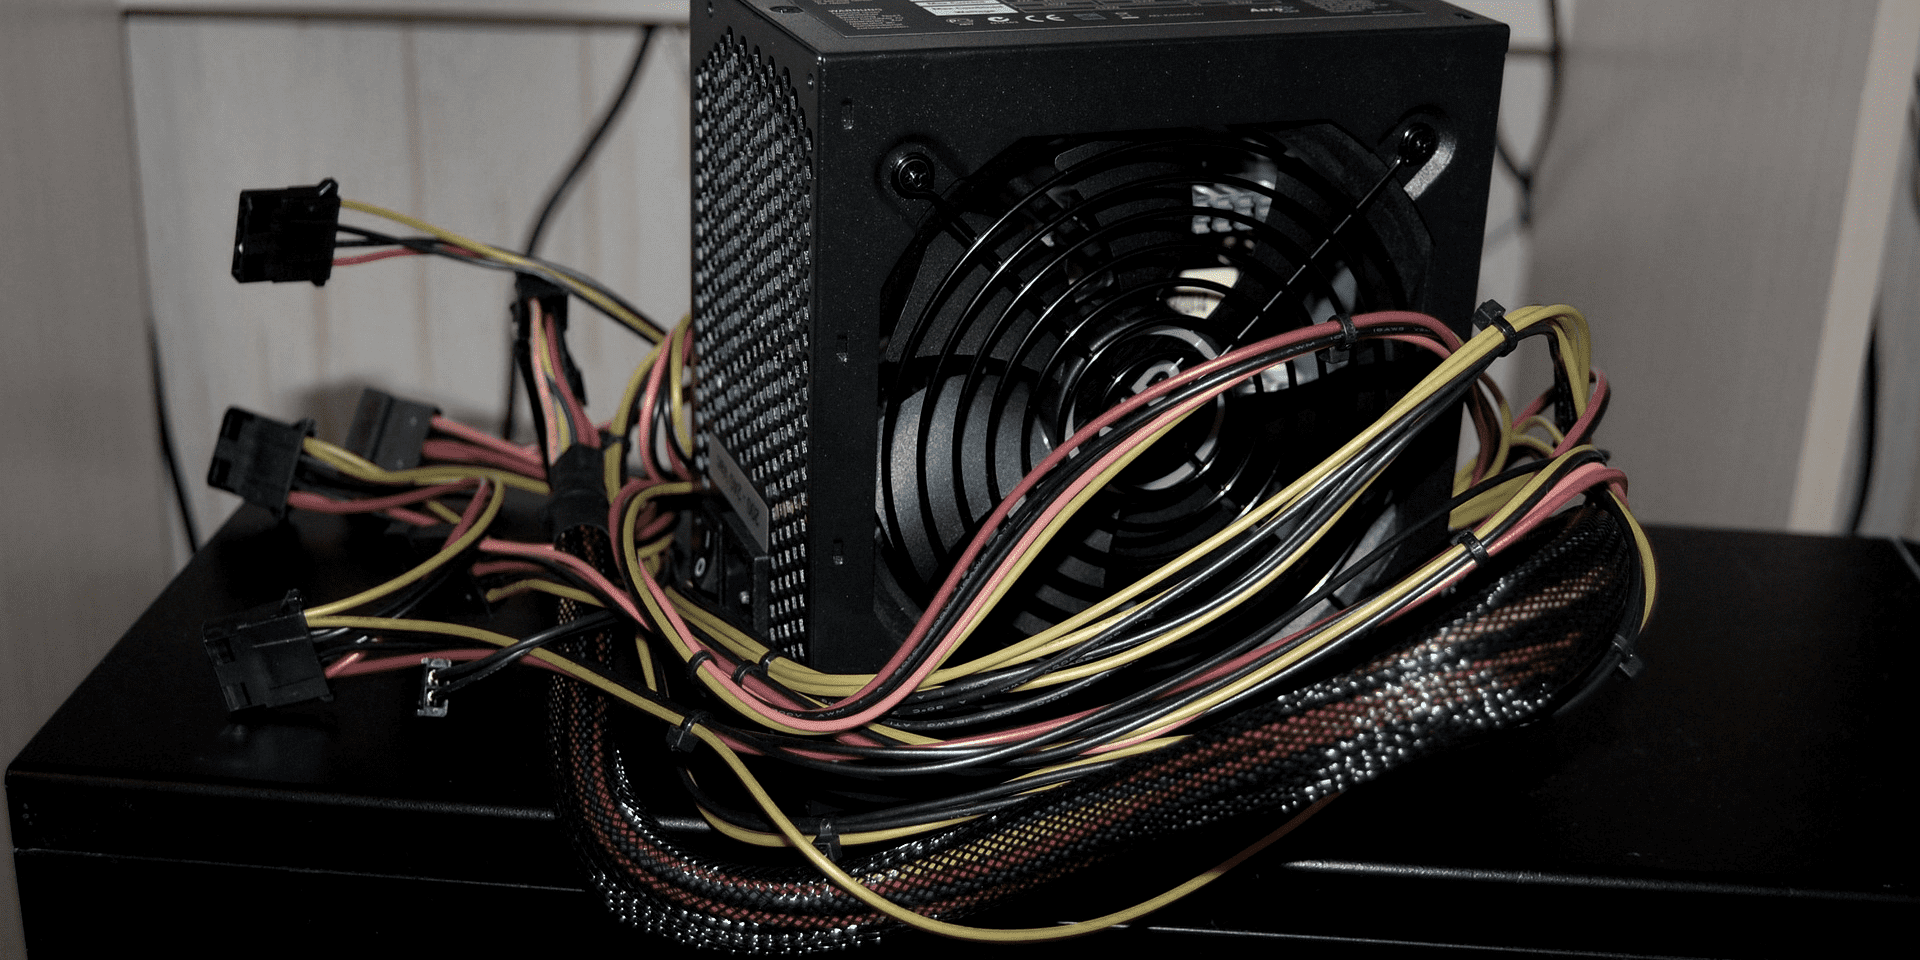

In [138]:
display.Image("https://modeliza.me/static/9ec7e1f13c3661b8638d696887b556c8/29114/psu.png")

Con estas opciones tenemos cubiertas nuestras necesidades de energía, es importante también fijarse que la fuente de alimentación soporta 2 GPUs

¿Qué es ese 80+?
Es una certificación, llamada “certificación 80 plus”. Básicamente si una fuente de alimentación no cuenta con esta certificación, es de muy muy mala calidad.

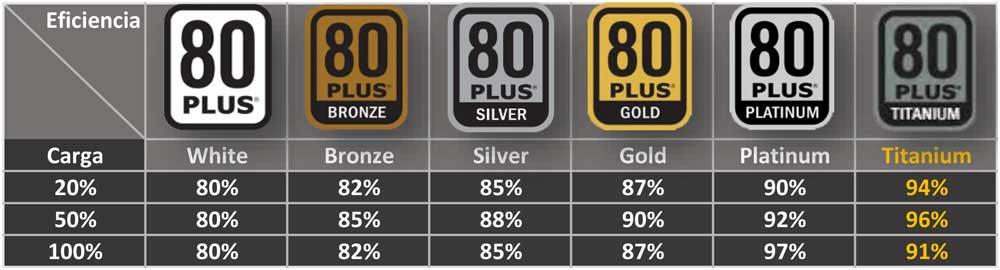

In [139]:
display.Image("https://hardzone.es/app/uploads/2018/04/80-PLUS-cetificaciones.jpg")

### Caja (Torre)

Otro de los fallos más comunes de las personas menos experimentadas al montar un ordenador es no tener en cuenta el espacio que va a ocupar los componentes a usar. O comprar cualquier caja que tiene mal acondicionamiento, poco espacio y lleva a los componentes a recalentarse y obtener bajo rendimiento. En este caso muestro una opcion, ya que me parece una de las mejores cajas que hay en el mercado a un buen precio

Lian Li PC-O11 air 143.55€

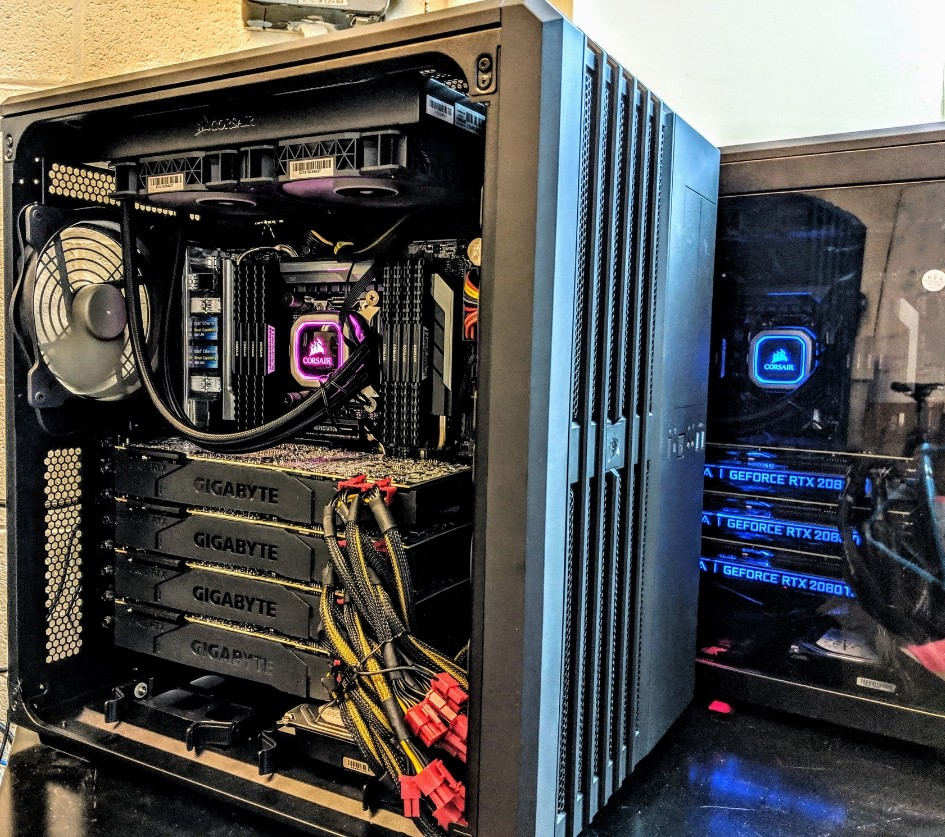

In [140]:
display.Image("https://i.blogs.es/176857/rtx6/1366_2000.jpg")

El principal requisito de la caja es su tamaño, debe ser compatible con el formato ATX de placa base, debe tener longitud suficiente para que quepa la tarjeta gráfica, y debe tener hueco para el radiador y ventiladores. Como usuario final, también puedes elegir si quieres que tenga ventana lateral, puertos frontales, o incluso paneles amortiguadores de sonido.

El hardware mostrado será suficiente para entrenar la mayoría de redes. 

Podrás entrenar:

1. Redes de clasificación como ResNet o Xception.

2. Redes de segmentación como U-Net o DeepLab.

3. Redes de localización como YOLO. En general.

Podrás utilizar "minibatches" de imágenes de hasta 512x512 pixels, a partir de este tamaño llegará un momento que no quepa ni una imagen en la memoria de la GPU, debido a que se guardan todos los resultados intermedios del procesamiento para corregir el error. 

Aún así, habrá muchas redes que puedas entrenar para imágenes de un tamaño cercano a 512x512, para esto deberás usar un tamaño de batch reducido, y hacer algunos pequeños ajustes, como por ejemplo sustituir batch normalization por batch renormalization.